In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [392]:
df = pd.read_csv("THP_clean.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Columns: 394 entries, newid to socialsupport_f
dtypes: float64(366), int64(11), object(17)
memory usage: 3.6+ MB


In [393]:
df.describe()

,newid,interviewer,uc,income_mo,income_hh,edu_mo,edu_fa,no_kids_over5_dead,no_kids_1_5_dead,no_kids_less1_dead,...,infantdev_1y,infantdev_1y_f,parentinputs_infancy,parentinputs_infancy_f,infantdev,infantdev_f,motherfinancial_7y,motherfinancial_7y_f,socialsupport,socialsupport_f
count,885.000000,885.000000,1203.000000,876.000000,756.000000,885.000000,1203.000000,882.000000,881.000000,881.000000,...,712.000000,7.080000e+02,816.000000,5.860000e+02,740.000000,7.030000e+02,885.000000,8.500000e+02,1120.000000,5.840000e+02
mean,446.225989,4.672316,20.358271,4.332192,141.707143,4.532203,7.319728,0.020408,0.037457,0.254257,...,0.202339,7.455650e-10,0.185357,-3.583618e-09,0.133936,1.593172e-10,0.177863,4.270588e-09,0.346108,1.469041e-09
std,256.597500,2.254451,11.440891,15.539970,116.350589,4.182804,3.226069,0.141472,0.217851,0.622537,...,0.986870,8.181502e-01,1.191635,9.470208e-01,1.007829,9.371984e-01,1.047386,8.890144e-01,1.083957,7.565686e-01
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.269506,-4.648146e+00,-4.007296,-2.417459e+00,-3.322134,-4.993645e+00,-1.108133,-4.792471e-01,-2.809055,-2.106218e+00
25%,225.000000,3.000000,10.000000,0.000000,70.000000,0.000000,7.000000,0.000000,0.000000,0.000000,...,-0.481443,-4.741491e-01,-0.516389,2.669969e-01,-0.541004,-5.238761e-01,-1.108133,-4.792471e-01,-0.380235,-5.160580e-01
50%,447.000000,5.000000,20.000000,0.000000,100.000000,5.000000,7.319728,0.000000,0.000000,0.000000,...,0.281445,2.411396e-02,0.260971,4.462136e-01,0.206483,2.035729e-02,0.521984,-1.630720e-01,0.385548,1.932745e-02
75%,668.000000,6.000000,30.000000,0.000000,180.000000,8.000000,10.000000,0.000000,0.000000,0.000000,...,0.969147,5.129925e-01,0.746556,5.413125e-01,0.876496,6.015202e-01,0.521984,-1.630720e-01,1.095594,5.129678e-01
max,889.000000,9.000000,40.000000,100.000000,800.000000,18.000000,16.000000,1.000000,3.000000,6.000000,...,2.511270,2.217049e+00,3.995981,7.250453e-01,2.439257,2.655170e+00,4.615942,4.415358e+00,2.739945,1.797304e+00


In [394]:
missing = df.isnull().sum()
percentage = (missing / df.shape[0]) * 100
print(pd.DataFrame({'Missing_count': missing, '% Missing': percentage}).sort_values(by='% Missing', ascending=False))

                     Missing_count  % Missing
relation_traj_f                839  69.742311
motherhealthindex_f            774  64.339152
fatherfinancial_f              754  62.676642
incomeindex_f                  706  58.686617
relationshipindex_f            647  53.782211
...                            ...        ...
first_childXtreat                0   0.000000
Group                            0   0.000000
treat                            0   0.000000
fertility_vars                   0   0.000000
uc                               0   0.000000

[394 rows x 2 columns]


In [395]:
df.duplicated().sum()

np.int64(0)

In [396]:
df.dtypes.to_csv("column_dtypes.csv")


In [397]:
cols = [
    "depressed_6m", "var29", "depressed_1y", "attrit", "dep_sample", "Group",
    "intervr_1", "intervr_2", "intervr_3", "intervr_4", "intervr_5", "intervr_6",
    "intervr_7", "intervr_8", "intervr_9",
    "lhw_1", "lhw_2", "lhw_3", "lhw_4", "lhw_5", "lhw_6", "lhw_7", "lhw_8", "lhw_9",
    "lhw_10", "lhw_11", "lhw_12", "lhw_13", "lhw_14", "lhw_15", "lhw_16", "lhw_17",
    "lhw_18", "lhw_19", "lhw_20", "lhw_21", "lhw_22", "lhw_23", "lhw_24", "lhw_25",
    "lhw_26", "lhw_27", "lhw_28", "lhw_29", "lhw_30", "lhw_31", "lhw_32", "lhw_33",
    "lhw_34", "lhw_35", "lhw_36", "lhw_37", "lhw_38", "lhw_39", "lhw_40", "lhw_41",
    "lhw_42", "lhw_43", "lhw_44", "lhw_45", "lhw_46", "lhw_47", "lhw_48", "lhw_49",
    "lhw_50", "lhw_51", "lhw_52", "lhw_53", "lhw_54", "lhw_55", "lhw_56", "lhw_57",
    "lhw_58", "lhw_59", "lhw_60", "lhw_61", "lhw_62", "lhw_63", "lhw_64", "lhw_65",
    "lhw_66",
]
df[cols] = df[cols].apply(pd.to_numeric)


In [398]:
df[cols] = df[cols].astype("Int64")

In [399]:
columns = [
    "newid", "income_hh", "edu_mo", "ideal_no_kids", "no_kids_over5_dead",
    "no_kids_1_5_dead", "no_kids_less1_dead", "hamd_baseline", "bdq_baseline",
    "edu_mo_baseline", "edu_fa_baseline", "kids_no", "var29", "mspss_baseline",
    "hamd_6m", "bdq_6m", "mspss_6m", "ses_6m", "hamd_1y", "bdq_1y", "mspss_1y",
    "ses_1y", "pregnant_12m", "play_mo_1y", "play_fa_1y", "vci", "vsi", "fri",
    "wmi", "psi", "fsiq", "sdq_emo", "sdq_cond", "sdq_hyper", "sdq_peer",
    "sdq_pro", "sdq_sum", "home_res", "home_mat", "home_emo", "home_learn",
    "home_enrich", "home_f_comp", "home_f_inter", "home_env", "home", "stroop",
    "panic", "separation", "injury_fear", "social_phobia", "obc", "gad",
    "spence", "three_groups", "grandmother_baseline", "employed_fa_baseline",
    "occupation_fa_baseline", "famstruct_baseline", "grandmother_6m",
    "grandmother_1y", "first_child", "employed_mo_baseline", "edu_lvl_mo_1",
    "edu_lvl_mo_2", "edu_lvl_mo_3", "ses_bl_flipped", "electricity", "radio",
    "tv", "fridge", "bicycle", "motorcycle", "aircon", "washingmachine",
    "waterpump", "cartruck", "pipedwater", "wellwithpump", "wellwater",
    "flushtoilet", "anylatrine", "brickwalls", "enoughfoodmoney", "metalroof",
    "bestroof", "mo_491_2", "mo_490_2", "mo_485_2", "mo_488_2", "PPI",
    "PPI_harsh", "PPI_harsh4age", "PPI_inconsistent", "classroom", "not_stunted",
    "home_obs", "maritalscale", "nonviolent", "relationship_husb",
    "relationship_inlaw", "maritalscale_1y", "relationship_husb_1y",
    "relationship_inlaw_1y", "nonviolent_1y", "empowered", "empowered_6m",
    "basicneeds", "enoughfood", "ses", "nodebt_7y", "expend_food", "expend_med",
    "expend_educ", "notunwell", "days_healthy", "mo_wt_6m", "notdepressed",
    "scid_tot", "impaired", "notdep", "notdep2011", "notdep2012", "notdep2013"
]
df[columns] = df[columns].apply(pd.to_numeric, errors="coerce")


In [400]:
df[columns] = df[columns].round().astype("Int64")
df["genhealth"].unique()

array([nan, 'Very good', 'Moderate', 'Good', '0', 'Bad'], dtype=object)

In [401]:

df["genhealth"] = df["genhealth"].replace("0", np.nan)
df["genhealth"] = df["genhealth"].astype("category")
df["genhealth"] = df["genhealth"].cat.add_categories(["Unknown"])
df["genhealth"] = df["genhealth"].fillna("Unknown")

In [402]:
df["mo_358"].unique()

array([nan, 'not played at all', '.5', '.25', 'once or twice ', '.75'],
      dtype=object)

In [403]:
df["mo_358"] = df["mo_358"].replace({
    ".25": "Rarely",
    ".5": "Sometimes",
    ".75": "Often",
    "not played at all": "Never",
    "once or twice": "Once or twice"
})

df["mo_358"] = pd.Categorical(
    df["mo_358"],
    categories=["Never", "Once or twice", "Rarely", "Sometimes", "Often"],
    ordered=True
)
df["mo_358"].unique()


[NaN, 'Never', 'Sometimes', 'Rarely', 'Often']
Categories (5, object): ['Never' < 'Once or twice' < 'Rarely' < 'Sometimes' < 'Often']

In [404]:
df["genhealth"].cat.categories

Index(['Bad', 'Good', 'Moderate', 'Very good', 'Unknown'], dtype='object')

In [405]:
categorical = ["grandmother","employed_mo","mo_360","ch_27",'ch_28', 'ch_29', 'ch_30', 'ch_31', 'ch_32', 'ch_33', 'ch_34', 'ch_35', 'ch_36']
df[categorical] = df[categorical].astype("category")

Did the treatment reduce maternal depression at 6 months and 1 year (depressed_6m, depressed_1y, hamd_6m, hamd_1y, bdq_6m, bdq_1y)?


In [406]:
df["treat"].describe() # everyone was treated

count    1203.000000
mean        0.509559
std         0.500117
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: treat, dtype: float64

In [407]:
df["hamd_baseline"].unique()

<IntegerArray>
[18, 13, <NA>, 15, 16, 14, 17, 11, 12, 9, 10, 20, 8, 22, 19, 5, 7, 21, 23, 6]
Length: 20, dtype: Int64

In [408]:
def baseline_depression(x):
    if x in range(0,8):
        return "No Depression"
    elif x in range(8, 14):
        return "Mild Depression"
    elif x in range(14, 19):
        return "Moderate Depression"
    elif x in range(19, 23):
        return "Severe Depression"
    else:
        return "Very Severe Depression"

In [409]:
def depressed(series):
    return (series == 1).sum()  #"yes" 


In [410]:
df["dep_sample"].value_counts()

dep_sample
1    704
0    300
Name: count, dtype: Int64

In [411]:
df["bdq_1y"].unique()

<IntegerArray>
[3, 0, <NA>, 1, 7, 9, 2, 8, 12, 11, 6, 13, 4, 5, 14, 10, 15]
Length: 17, dtype: Int64

In [412]:
dep = df["hamd_baseline"].apply(baseline_depression).value_counts()

In [413]:
hamd_dep_baseline = df.groupby(df["hamd_baseline"].apply(baseline_depression))["dep_sample"].apply(depressed)
hamd_dep_6m = df.groupby(df["hamd_6m"].apply(baseline_depression))["depressed_6m"].apply(depressed)
hamd_dep_1y = df.groupby(df["hamd_1y"].apply(baseline_depression))["depressed_1y"].apply(depressed)

print("Hamilton Depression Scores vs Depressed people at the start of the treatment")
print(hamd_dep_baseline)
print()

print("Hamilton Depression Scores vs Depressed people at 6 Months")
print(hamd_dep_6m)
print()

print("Hamilton Depression Scores vs Depressed people at 1 Year")
print(hamd_dep_1y)


Hamilton Depression Scores vs Depressed people at the start of the treatment
hamd_baseline
Mild Depression           283
Moderate Depression       253
No Depression              21
Severe Depression         141
Very Severe Depression      6
Name: dep_sample, dtype: int64

Hamilton Depression Scores vs Depressed people at 6 Months
hamd_6m
Mild Depression           136
Moderate Depression        80
No Depression              13
Severe Depression          68
Very Severe Depression     11
Name: depressed_6m, dtype: int64

Hamilton Depression Scores vs Depressed people at 1 Year
hamd_1y
Mild Depression           112
Moderate Depression       102
No Depression              11
Severe Depression          80
Very Severe Depression     32
Name: depressed_1y, dtype: int64


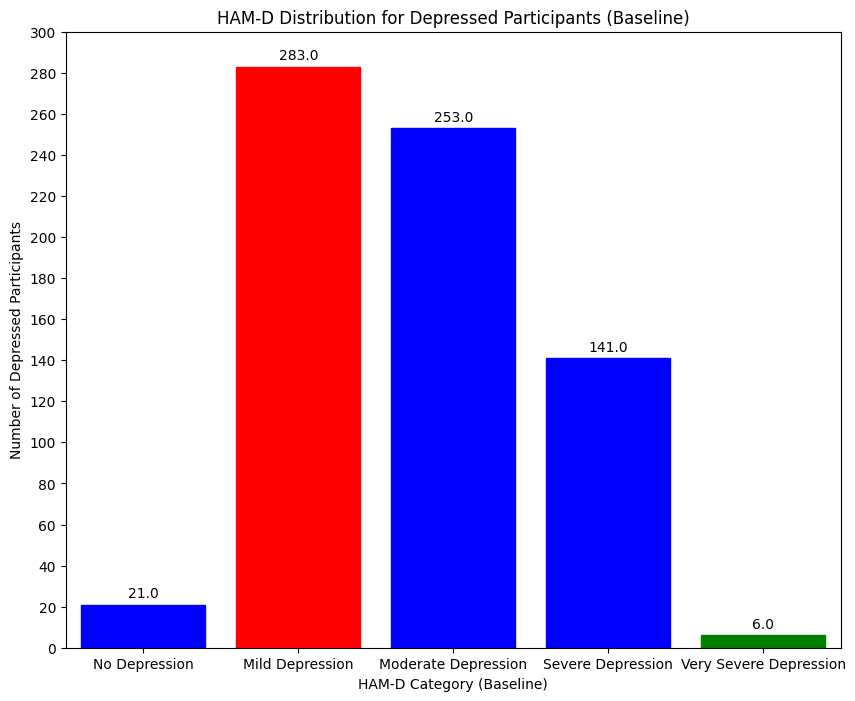

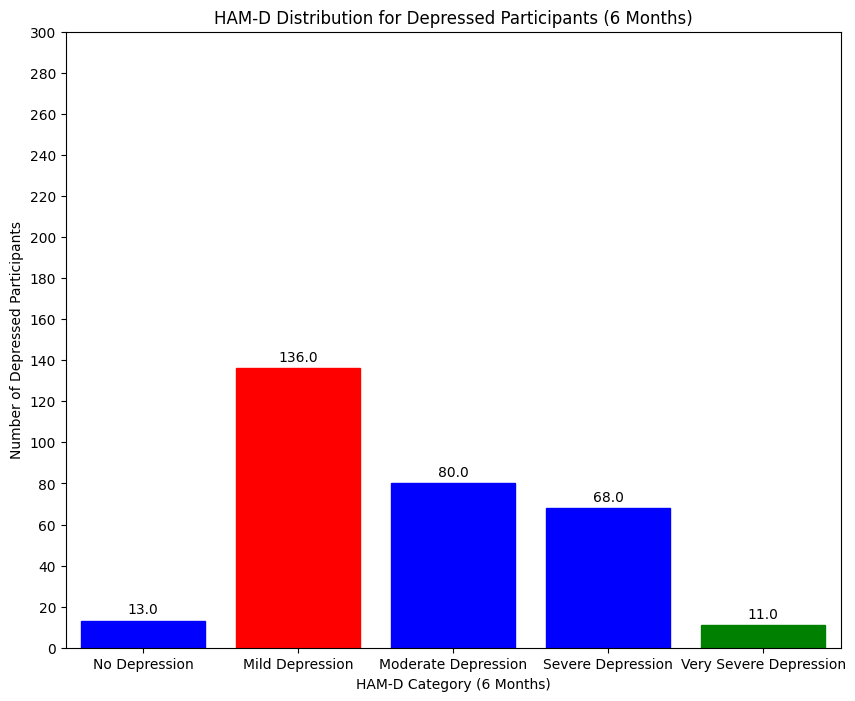

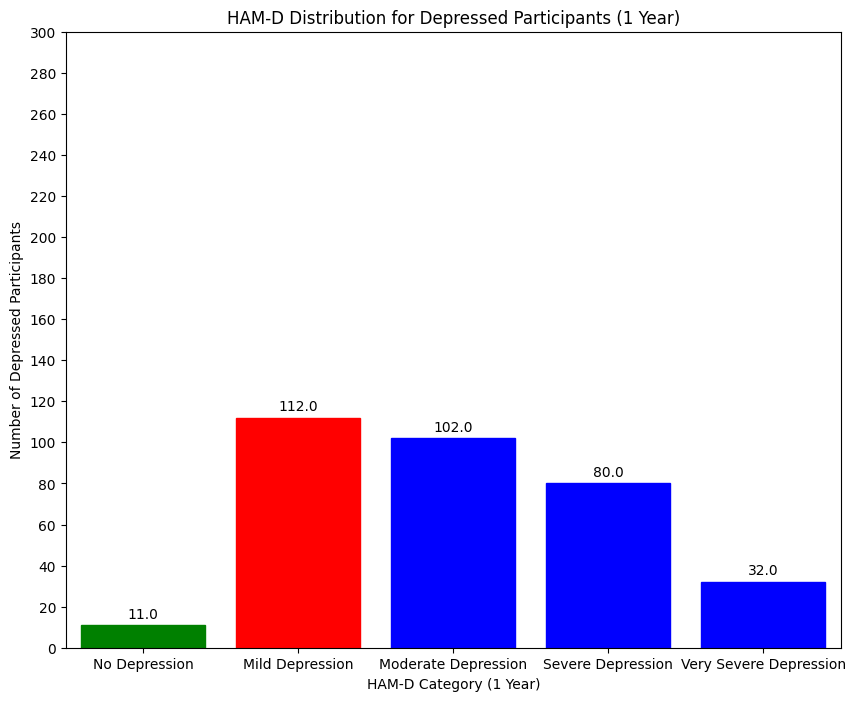

In [414]:

col_pairs = [
    ("hamd_baseline", "dep_sample", "Baseline"),
    ("hamd_6m", "depressed_6m", "6 Months"),
    ("hamd_1y", "depressed_1y", "1 Year")
]

for hamd_col, dep_col, label in col_pairs:
    depressed_df = df[df[dep_col] == 1].copy()
    depressed_df["hamd_cat"] = depressed_df[hamd_col].apply(baseline_depression)
    plt.figure(figsize=(10, 8))
    value = sn.countplot(
        x="hamd_cat",
        data=depressed_df,
        order=["No Depression", "Mild Depression", "Moderate Depression", "Severe Depression", "Very Severe Depression"]
    )
    counts = depressed_df["hamd_cat"].value_counts()
    max_count = counts.max()
    min_count = counts.min()
    for bar in value.patches:
        height = bar.get_height()
        if height == max_count:
            bar.set_color("Red")
        elif height == min_count:
            bar.set_color("Green")
        else:
            bar.set_color("Blue")
        value.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom')
    plt.xlabel(f"HAM-D Category ({label})")
    plt.ylabel("Number of Depressed Participants")
    plt.yticks(range(0, 320, 20))
    plt.title(f"HAM-D Distribution for Depressed Participants ({label})")
    plt.show()


Depressed people versus treatment

In [415]:
#function to label groups
def group_label(row):
    if pd.isna(row["dep_sample"]) or pd.isna(row["treat"]):
        return "Unknown"
    elif row["dep_sample"] == 0 and row["treat"] == 0:
        return "Not Depressed, No Treatment"
    elif row["dep_sample"] == 0 and row["treat"] == 1:
        return "Not Depressed, Treated"
    elif row["dep_sample"] == 1 and row["treat"] == 0:
        return "Depressed, No Treatment"
    else:  # dep_sample == 1 and treat == 1
        return "Depressed, Treated"

df["group"] = df.apply(group_label, axis=1)

#Summarizing outcomes by group
summary = df.groupby("group").agg(
    baseline_dep=("dep_sample", "sum"),
    depressed_6m=("depressed_6m", "sum"),
    depressed_1y=("depressed_1y", "sum"),
    n=("dep_sample", "count")
)
#Proportion calculation
summary["prop_depressed6m"] = summary["depressed_6m"] / summary["n"]
summary["prop_depressed1y"] = summary["depressed_1y"] / summary["n"]

print(summary)

                             baseline_dep  depressed_6m  depressed_1y    n  \
group                                                                        
Depressed, No Treatment               347           179           200  347   
Depressed, Treated                    357            77            93  357   
Not Depressed, No Treatment             0             0             0  150   
Not Depressed, Treated                  0             0             0  150   
Unknown                                 0            52            44    0   

                             prop_depressed6m  prop_depressed1y  
group                                                            
Depressed, No Treatment               0.51585          0.576369  
Depressed, Treated                   0.215686          0.260504  
Not Depressed, No Treatment               0.0               0.0  
Not Depressed, Treated                    0.0               0.0  
Unknown                                   inf            

In [416]:
#not depressed participants over the years
nd11= df["notdep2011"].value_counts()
nd12= df["notdep2012"].value_counts()
nd13= df["notdep2013"].value_counts()

print(nd11)
print(nd12)
print(nd13)


notdep2011
1    1046
0      38
Name: count, dtype: Int64
notdep2012
1    1050
0      34
Name: count, dtype: Int64
notdep2013
1    888
0    196
Name: count, dtype: Int64


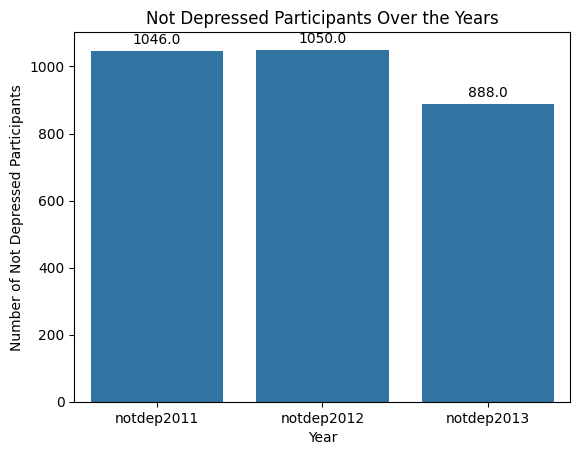

In [417]:
plot = sn.barplot(x=["notdep2011", "notdep2012", "notdep2013"], y=[nd11[1], nd12[1], nd13[1]])
for bar in plot.patches:
    height = bar.get_height()
    plot.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3), textcoords="offset points",
                   ha='center', va='bottom')
plt.ylabel("Number of Not Depressed Participants")
plt.xlabel("Year")
plt.title("Not Depressed Participants Over the Years")
plt.show()


People who weren't depressed

In [418]:
#Not depressed for two consecutive years
notd1213 = df["notdep1213"].value_counts()
notd1213

notdep1213
1.0    848
0.0     37
Name: count, dtype: int64

In [419]:
df["dur_notdep"].value_counts()

dur_notdep
3.0    872
2.0    168
1.0     32
0.0     12
Name: count, dtype: int64

In [420]:
#participants not depressed in 2011 and 2012 but depressed in 2013
checking = df[(df["notdep2011"]==1) & (df["notdep2012"]==1) & (df["notdep2013"]==0)]
checking.shape[0]

156

Role of Social Support



Does social support (mspss_baseline, mspss_6m, mspss_1y, mspss_tot, socialsupport) buffer the effect of depression?

In [421]:
df["mspss_1y"].unique()

<IntegerArray>
[  48,   75, <NA>,   21,   24,   76,   55,   73,   58,   33,   68,   65,   77,
   61,   72,   37,   71,   36,   60,   15,   20,   39,   13,   74,   18,   12,
   23,   50,   35,   53,   14,   70,   19,   44,   28,   56,   29,   16,   59,
   38,   57,   17,   47,   52,   63,   67,   34,   66,   40,   62,   64,   30,
   69,   54,   51,   46,   42,   41,   79,   45,   43,   32,   26,   49,   27,
   31,   25]
Length: 67, dtype: Int64

In [422]:
def mspss_category(x):
    if x < 28:
        return "Low"
    elif 28 <= x < 56:
        return "Medium"
    elif x >= 56:
        return "High"
    else:
        return "Unknown"
mpss_scoresbase = df["mspss_baseline"].apply(mspss_category)
mpss_scores1y = df["mspss_1y"].apply(mspss_category)  
mpss_scores6m = df["mspss_6m"].apply(mspss_category)

In [423]:
def not_depressed(series):
    return (series == 0).sum()

In [424]:
#Do participants with higher MSPSS scores at baseline have a lower likelihood of being depressed (dep_sample)?
support = df.groupby(mpss_scoresbase)["dep_sample"].apply(depressed)
print(support)

mspss_baseline
High       179
Low         86
Medium     439
Unknown      0
Name: dep_sample, dtype: int64


In [425]:
#Is there a significant difference in MSPSS scores between depressed vs non-depressed groups at 6 months (depressed_6m) or 1 year (depressed_1y)?
depressedmpss6m = df.groupby(mpss_scores6m)["depressed_6m"].apply(depressed)
print("Depressed after 6 months based on MSPSS scores")
print(depressedmpss6m)
print()

notdepressedmpss6m = df.groupby(mpss_scores6m)["depressed_6m"].apply(not_depressed)
print("Not Depressed after 6 months based on MSPSS scores")
print(notdepressedmpss6m)
print()

depressedmpss1y = df.groupby(mpss_scores1y)["depressed_1y"].apply(depressed)
print("Depressed after 1 year based on MSPSS scores")
print(depressedmpss1y)
print()

notdepressedmpss1y = df.groupby(mpss_scores1y)["depressed_1y"].apply(not_depressed)
print("Not Depressed after 1 year based on MSPSS scores")
print(notdepressedmpss1y)

Depressed after 6 months based on MSPSS scores
mspss_6m
High        27
Low         56
Medium     225
Unknown      0
Name: depressed_6m, dtype: int64

Not Depressed after 6 months based on MSPSS scores
mspss_6m
High       219
Low         29
Medium     262
Unknown      0
Name: depressed_6m, dtype: int64

Depressed after 1 year based on MSPSS scores
mspss_1y
High        20
Low         53
Medium     264
Unknown      0
Name: depressed_1y, dtype: int64

Not Depressed after 1 year based on MSPSS scores
mspss_1y
High       190
Low          8
Medium     256
Unknown      0
Name: depressed_1y, dtype: int64


In [426]:
#What proportion of people with low vs high MSPSS were still depressed at 6 months and 1 year?
proportion_depressed_6m = depressedmpss6m / (depressedmpss6m + notdepressedmpss6m)
print(proportion_depressed_6m)
print()

proportion_depressed_1y = depressedmpss1y / (depressedmpss1y + notdepressedmpss1y)
print(proportion_depressed_1y)


mspss_6m
High       0.109756
Low        0.658824
Medium     0.462012
Unknown         NaN
Name: depressed_6m, dtype: float64

mspss_1y
High       0.095238
Low        0.868852
Medium     0.507692
Unknown         NaN
Name: depressed_1y, dtype: float64


<Axes: >

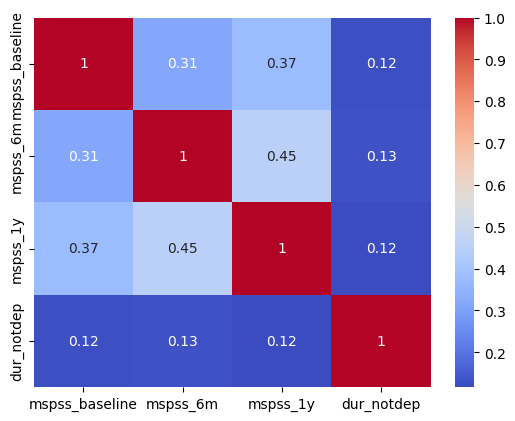

In [427]:
#Is MSPSS correlated with duration not depressed (dur_notdep)? (i.e., Do people with more social support stay well longer?)
sn.heatmap(df[['mspss_baseline', 'mspss_6m', 'mspss_1y', 'dur_notdep']].corr(), annot=True, cmap='coolwarm')


Weak correlation between mspss_baseline and dur_notdep

2. Do people who were depressed at the start of the study recover faster with more support(mspss)

In [428]:


# Filtering the dataframe for depressed participants at baseline
depressed_baseline = df[df["dep_sample"] == 1]
#categorizing mspss_baseline using msspss_category function
mspss_scores = depressed_baseline["mspss_baseline"].apply(mspss_category)

#contigency table for depression at 6 months
#0 : Not Depressed, 1 : Depressed
contingency_6m = pd.crosstab(mspss_scores, depressed_baseline["depressed_6m"])

# Performing chi-square test
chi2_6m, p_6m, dof_6m, expected_6m = chi2_contingency(contingency_6m)

print("Contingency table for people who were depressed after 6 months")
print(contingency_6m)
print(f"\nChi-square = {chi2_6m:.2f}, p-value = {p_6m:.4f}, dof = {dof_6m}")

#contigency table for depression at 1 year
#0 : Not Depressed, 1 : Depressed
contingency_1y = pd.crosstab(mspss_scores, depressed_baseline["depressed_1y"])
chi2_1y, p_1y, dof_1y, expected_1y = chi2_contingency(contingency_1y)

print("\nContingency table for people who were depressed after 1 year")
print(contingency_1y)
print(f"\nChi-square = {chi2_1y:.2f}, p-value = {p_1y:.4f}, dof = {dof_1y}")


Contingency table for people who were depressed after 6 months
depressed_6m      0    1
mspss_baseline          
High            129   49
Low              45   41
Medium          273  166

Chi-square = 11.15, p-value = 0.0038, dof = 2

Contingency table for people who were depressed after 1 year
depressed_1y      0    1
mspss_baseline          
High            123   55
Low              40   46
Medium          247  192

Chi-square = 14.21, p-value = 0.0008, dof = 2


Choosing alpha or significance level as 0.05: The chi test shows that p value is less than 0.05 in both cases for people wo are depressed after one year as well as individuals after 6 months

Headline : Socioeconomic Status Score And Wealth


Is Maternal depression more persisitent among poorer households

In [429]:
#ordering ses score into a category
sescategory = pd.Categorical(
            df["ses_bl_flipped"],
            categories=[0, 1, 2, 3, 4],
            ordered=True)
sescategory

[1, 1, NaN, 0, NaN, ..., 3, 2, 1, NaN, 1]
Length: 1203
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

What is the average and sample size of household income for each socioeconomic status group(ses_bl_flipped)?

In [430]:
mean_household_income = df.groupby("ses_bl_flipped")["income_hh"].apply(lambda x: (x*100).mean())
household_income = df.groupby("ses_bl_flipped")["income_hh"].apply(lambda x: (x*100).count())

print(mean_household_income)
print(household_income)

ses_bl_flipped
0     9520.754717
1    11536.486486
2    14856.500000
3    22073.170732
4    31714.285714
Name: income_hh, dtype: float64
ses_bl_flipped
0    106
1    148
2    200
3     41
4      7
Name: income_hh, dtype: int64


What is the size of household income (scaled by 100) for each socioeconomic group for depressed and non depressed people

In [431]:
poordepressed = df.groupby("ses_bl_flipped")["dep_sample"].apply(depressed)
print(poordepressed)

poornotdepressed = df.groupby("ses_bl_flipped")["dep_sample"].apply(not_depressed)
print(poornotdepressed)

ses_bl_flipped
0    154
1    205
2    273
3     60
4     12
Name: dep_sample, dtype: int64
ses_bl_flipped
0    0
1    0
2    0
3    0
4    0
Name: dep_sample, dtype: int64


Socialeconomic status test was not conducted not depressed people

Are moms in the poorest group more likely to be depressed than moms in the richest group, at any point in time (6 months, 1 year, or baseline)?

In [432]:
#Create income quantiles
df['income_quantile'] = pd.qcut(df['income_hh'], q=5, labels=['Q1_Poorest', 'Q2', 'Q3', 'Q4', 'Q5_Richest'])
#Calculate depression rates by quantile for each period or range i.e 6 months, 1 year, sample
depression_vars = ['depressed_6m', 'depressed_1y', 'dep_sample']

print("Depression rates per income quantile")
print("Percentages of mothers who are depressed")
for dep_var in depression_vars:
    rates = df.groupby('income_quantile',observed=False)[dep_var].mean() * 100
    print(f"\n{dep_var}:")
    for quantile in ['Q1_Poorest', 'Q5_Richest']:
        print(f"{quantile}: {rates[quantile]:.1f}%")

    #Comparison
    q1_rate = rates['Q1_Poorest']
    q5_rate = rates['Q5_Richest']
    higher = "Yes" if q1_rate > q5_rate else "No"
    diff = q1_rate - q5_rate
    print(f"Q1 higher than Q5? {higher} (difference: {diff:+.1f}%)")
#Summary
print()
print("Summary")

all_higher = []
for dep_var in depression_vars:
    rates = df.groupby('income_quantile',observed=False)[dep_var].mean() * 100
    q1_higher = rates['Q1_Poorest'] > rates['Q5_Richest']
    all_higher.append(q1_higher)

overall_answer = "Yes" if all(all_higher) else "No"
print(f"Do poorest households higher depression rates? {overall_answer}")

#Evidence
print("Evidence")
for i, dep_var in enumerate(depression_vars):
    rates = df.groupby('income_quantile',observed=False)[dep_var].mean() * 100
    print(f"{dep_var}: {rates['Q1_Poorest']:.1f}% vs {rates['Q5_Richest']:.1f}% {'Yes' if all_higher[i] else 'No'}")

Depression rates per income quantile
Percentages of mothers who are depressed

depressed_6m:
Q1_Poorest: 39.0%
Q5_Richest: 31.9%
Q1 higher than Q5? Yes (difference: +7.1%)

depressed_1y:
Q1_Poorest: 46.3%
Q5_Richest: 25.0%
Q1 higher than Q5? Yes (difference: +21.3%)

dep_sample:
Q1_Poorest: 73.7%
Q5_Richest: 58.1%
Q1 higher than Q5? Yes (difference: +15.6%)

Summary
Do poorest households higher depression rates? Yes
Evidence
depressed_6m: 39.0% vs 31.9% Yes
depressed_1y: 46.3% vs 25.0% Yes
dep_sample: 73.7% vs 58.1% Yes


Do children in houses with better amenties perfrom better?

In [433]:
#Is child cognitive performance (IQ, math, Urdu) higher in households with better housing conditions (e.g., piped water, flush toilet, concrete walls)?
needed = ["pipedwater", "flushtoilet", "brickwalls", "wellwithpump", "wellwater", "electricity"]
rows = ["math", "urdu", "fsiq","cognindex","stroop"]

for need in needed:
    if need in df.columns:
        print(f"\nHousing Condition: {need}")
        for row in rows:
            if row in df.columns:
                group1 = df[df[need] == 1][row].dropna()
                group0 = df[df[need] == 0][row].dropna()
                if len(group1) > 0 and len(group0) > 0:
                    f_stat, p_val = f_oneway(group1, group0)
                    mean1 = group1.mean()
                    mean0 = group0.mean()
                    print(f"{row}: Mean with {need}=1: {mean1:.2f}, Mean with {need}=0: {mean0:.2f}, F-statistic: {f_stat:.2f}, p-value: {p_val:.6f}")
                else:
                    print(f"{row}: Not enough data for comparison.")



Housing Condition: pipedwater
math: Mean with pipedwater=1: 9.44, Mean with pipedwater=0: 9.13, F-statistic: 0.46, p-value: 0.498604
urdu: Mean with pipedwater=1: 6.60, Mean with pipedwater=0: 6.41, F-statistic: 0.16, p-value: 0.686963
fsiq: Mean with pipedwater=1: 82.35, Mean with pipedwater=0: 82.32, F-statistic: 0.00, p-value: 0.984994
cognindex: Mean with pipedwater=1: 0.01, Mean with pipedwater=0: 0.01, F-statistic: 0.00, p-value: 0.993962
stroop: Mean with pipedwater=1: 13.77, Mean with pipedwater=0: 14.10, F-statistic: 0.68, p-value: 0.408691

Housing Condition: flushtoilet
math: Mean with flushtoilet=1: 10.29, Mean with flushtoilet=0: 8.76, F-statistic: 22.00, p-value: 0.000003
urdu: Mean with flushtoilet=1: 7.56, Mean with flushtoilet=0: 6.03, F-statistic: 21.06, p-value: 0.000005
fsiq: Mean with flushtoilet=1: 85.26, Mean with flushtoilet=0: 81.26, F-statistic: 14.46, p-value: 0.000159
cognindex: Mean with flushtoilet=1: 0.27, Mean with flushtoilet=0: -0.08, F-statistic: 14.

Not much evidence

Do people with higher social support (MSPSS scores) have lower rates of depression at baseline, 6 months, or 1 year?

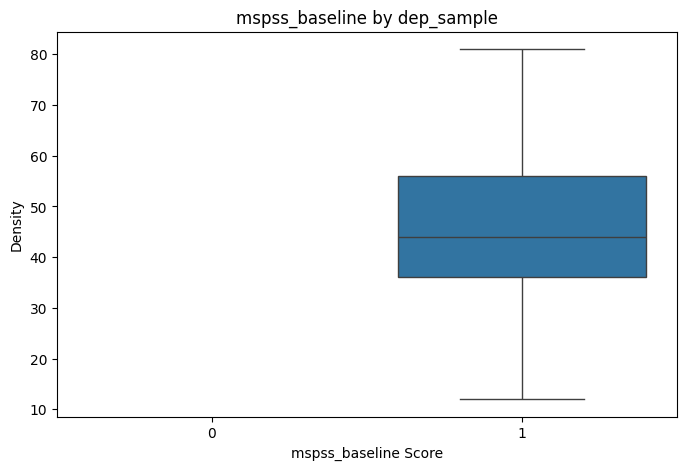

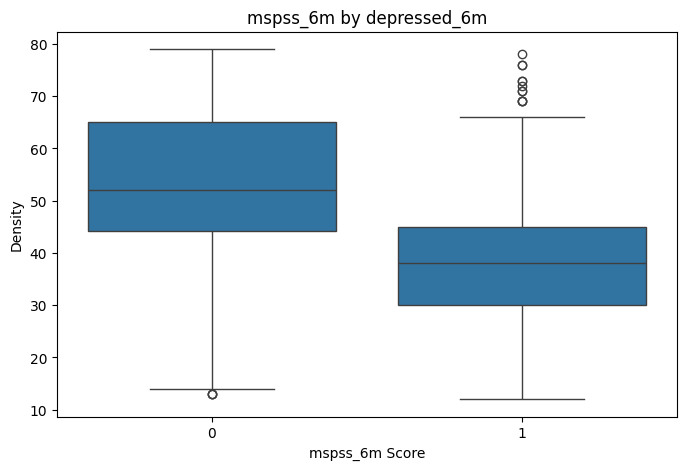

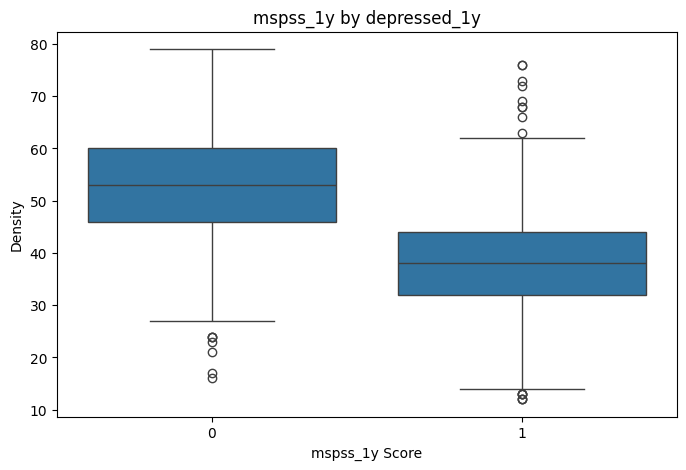

In [435]:

cols = {
    "mspss_baseline":"dep_sample",
    "mspss_6m":"depressed_6m",
    "mspss_1y":"depressed_1y"
}

for mpss_col, dep_col in cols.items():
    plt.figure(figsize=(8, 5))
    sn.boxplot(
        data=df,
        x=dep_col,
        y=mpss_col
    )
    plt.xlabel(f"{mpss_col} Score")
    plt.ylabel("Density")
    plt.title(f"{mpss_col} by {dep_col}")
    plt.show()

Do maternal depression affect child grades (fsiq, cognindex, math, stroop, urdu)?

In [436]:
df["math"] = pd.to_numeric(df["math"], errors="coerce")
df["math"] = df["math"].round().astype("Int64")

df["urdu"] = pd.to_numeric(df["urdu"], errors="coerce")
df["urdu"] = df["urdu"].round().astype("Int64")
df["math"].unique()

<IntegerArray>
[<NA>, 6, 5, 12, 10, 8, 3, 0, 7, 11, 9, 4, 1, 2, 14, 16]
Length: 16, dtype: Int64

In [437]:
def cognitive(series):
    value = df.groupby(series).agg({
        "fsiq": "mean",
        "cognindex": "mean",
        "math": "mean",
        "urdu": "mean",
        "stroop": "mean"
    })
    return value

In [438]:
print(cognitive("dep_sample"))
print(cognitive("depressed_6m"))
print(cognitive("depressed_1y"))

                 fsiq  cognindex     math      urdu     stroop
dep_sample                                                    
0           83.635452   0.145802  9.69697  7.296296  14.303333
1            82.32363   0.013257  9.16753  6.436207  14.064957
                   fsiq  cognindex      math      urdu     stroop
depressed_6m                                                     
0             82.384409   0.008511  9.168022  6.528455  13.943548
1             82.216981   0.021777   9.15311  6.285714  14.273585
                   fsiq  cognindex      math      urdu     stroop
depressed_1y                                                     
0             83.432353   0.085314  9.489676  6.740413  14.138235
1             80.778689  -0.086984  8.698745  6.016667  13.959016


In [439]:
def anova(series,column):

    f_stat, p_val = f_oneway(
        df[df[series]==0][column].dropna(),
        df[df[series]==1][column].dropna()
    )
    return f_stat, p_val
dictionary = {
    "dep_sample": ["fsiq", "cognindex", "math", "urdu", "stroop"],
    "depressed_6m": ["fsiq", "cognindex", "math", "urdu", "stroop"],
    "depressed_1y": ["fsiq", "cognindex", "math", "urdu", "stroop"],
    "depressed": ["fsiq", "cognindex", "math", "urdu", "stroop"]
}
for series, columns in dictionary.items():
    print(f"ANOVA results for {series}:")
    for column in columns:
        f_stat, p_val = anova(series, column)
        print(f"{column}: F-statistic = {f_stat:.2f}, p-value = {p_val:.6f}")
    print()

ANOVA results for dep_sample:
fsiq: F-statistic = 2.40, p-value = 0.121890
cognindex: F-statistic = 3.41, p-value = 0.065205
math: F-statistic = 4.46, p-value = 0.034934
urdu: F-statistic = 10.46, p-value = 0.001264
stroop: F-statistic = 1.17, p-value = 0.280507

ANOVA results for depressed_6m:
fsiq: F-statistic = 0.03, p-value = 0.864240
cognindex: F-statistic = 0.03, p-value = 0.873631
math: F-statistic = 0.00, p-value = 0.961318
urdu: F-statistic = 0.60, p-value = 0.439472
stroop: F-statistic = 1.46, p-value = 0.227674

ANOVA results for depressed_1y:
fsiq: F-statistic = 7.84, p-value = 0.005292
cognindex: F-statistic = 4.53, p-value = 0.033773
math: F-statistic = 7.04, p-value = 0.008175
urdu: F-statistic = 5.63, p-value = 0.017934
stroop: F-statistic = 0.45, p-value = 0.501839

ANOVA results for depressed:
fsiq: F-statistic = 30.85, p-value = 0.000000
cognindex: F-statistic = 22.29, p-value = 0.000003
math: F-statistic = 22.23, p-value = 0.000003
urdu: F-statistic = 22.29, p-value

Do moms who are depressed invest less time, money, or positive parenting compared to moms who aren’t depressed? Also, does marital quality or nonviolent relationships look different between depressed and non-depressed moms?

In [440]:
df["maritalscale"] = pd.Categorical(
    df["maritalscale"], categories=[0, 1, 2, 3, 4, 5, 6], ordered=True)
df["maritalscale_1y"] = pd.Categorical(
    df["maritalscale_1y"], categories=[0, 1, 2, 3, 4, 5, 6], ordered=True)
df[["relationship_husb","relationship_husb_1y"]] = pd.Categorical(df[["relationship_husb","relationship_husb_1y"]], categories=[1,2,3,4,5],ordered=True)
df["maritalscale"].cat.categories

Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

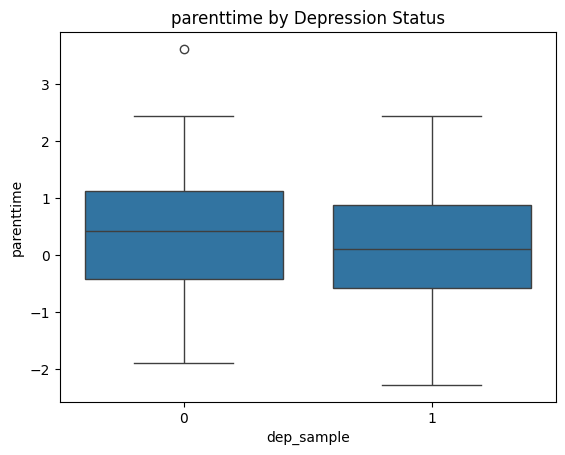

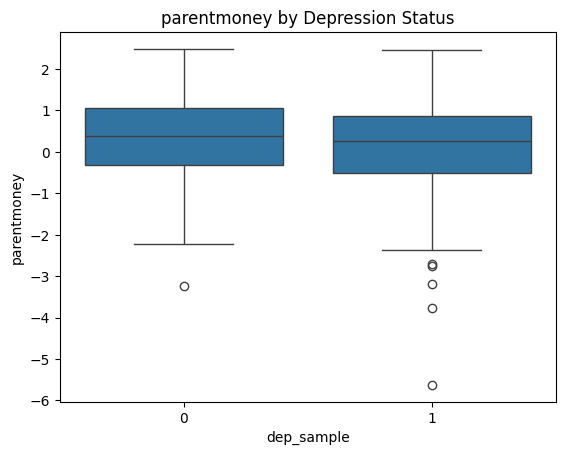

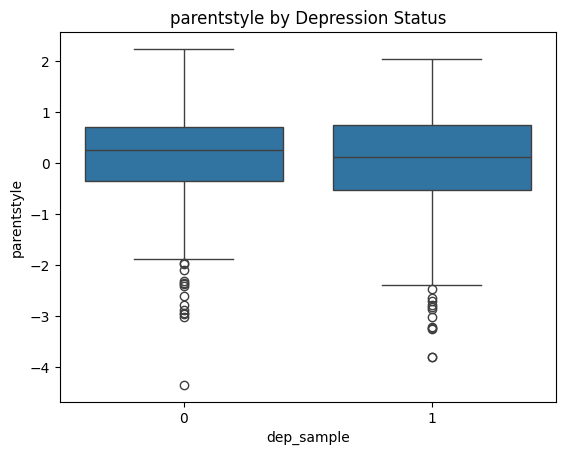

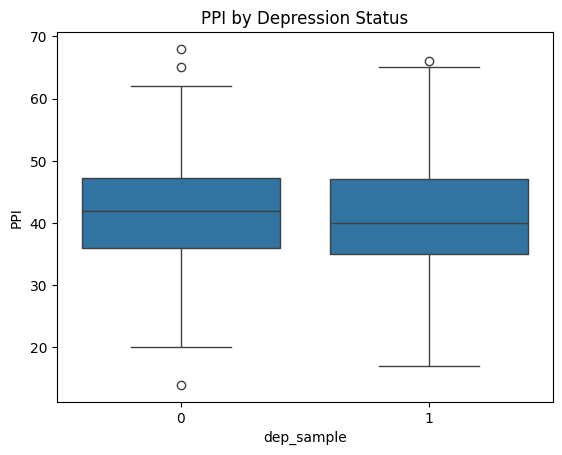

MARITALSCALE by Treatment % distribution
maritalscale    0    1    2    3    4     5     6
depressed                                        
0.0           0.7  3.5  1.9  2.5  4.1   9.3  77.8
1.0           4.4  5.5  5.5  7.1  3.8  14.8  58.8


RELATIONSHIP_INLAW by Treatment % distribution
relationship_inlaw    1     2     3     4     5
depressed                                      
0.0                 5.5   7.9  31.3  37.9  17.4
1.0                 4.5  17.0  45.5  26.8   6.2




nonviolent,0,1
treat,,
0,23.148148,76.851852
1,24.824356,75.175644


In [441]:

# Comparing means of parental investment by depression
df.groupby("dep_sample")[["parenttime","parentmoney","parentstyle","PPI"]].mean()


for col in ["parenttime","parentmoney","parentstyle","PPI"]:
    sn.boxplot(x="dep_sample", y=col, data=df)
    plt.title(f"{col} by Depression Status")

    plt.show()

for col in ["maritalscale","relationship_inlaw"]:
    print(f"{col.upper()} by Treatment % distribution")
    counts = df.groupby("depressed")[col].value_counts(normalize=True).unstack(fill_value=0) * 100
    print(counts.round(1))
    print("\n")


# Crosstab for nonviolent
pd.crosstab(df["treat"], df["nonviolent"], normalize="index") * 100

Physical health linkage:How does depression status relate to general health, child growth, and overall functioning (GAF)

In [442]:
#converting the df columns to integers
def conversion(columname):
    df[columname] = pd.to_numeric(df[columname], errors="coerce")
    df[columname] = df[columname].astype("Int64")
conversion("gaf_baseline")
conversion("gaf_6m_2")
conversion("gaf_1y_2")

In [443]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [
    "Extreme","Critical","Severe","Very Serious","Serious","Moderate","Fair","Good","Very Good","Excellent"
]
gaf_cols = ["gaf_baseline", "gaf_6m_2", "gaf_1y_2"]

for col in gaf_cols:
    df[col + "_cat"] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)

print(df[[*gaf_cols, *[c+"_cat" for c in gaf_cols]]].head())



   gaf_baseline  gaf_6m_2  gaf_1y_2 gaf_baseline_cat gaf_6m_2_cat gaf_1y_2_cat
0            60         5        30         Moderate      Extreme       Severe
1            66         5         3             Fair      Extreme      Extreme
2          <NA>      <NA>      <NA>              NaN          NaN          NaN
3            57        22        15         Moderate       Severe     Critical
4          <NA>      <NA>      <NA>              NaN          NaN          NaN


In [444]:
print(df["gaf_baseline_cat"].value_counts())
print()

print(df["gaf_6m_2_cat"].value_counts())
print()

print(df["gaf_1y_2_cat"].value_counts())

gaf_baseline_cat
Fair            526
Moderate        376
Good              1
Extreme           0
Critical          0
Severe            0
Serious           0
Very Serious      0
Very Good         0
Excellent         0
Name: count, dtype: int64

gaf_6m_2_cat
Extreme         432
Severe          157
Critical        119
Very Serious    110
Serious           0
Moderate          0
Fair              0
Good              0
Very Good         0
Excellent         0
Name: count, dtype: int64

gaf_1y_2_cat
Extreme         366
Severe          153
Very Serious    141
Critical        131
Serious           0
Moderate          0
Fair              0
Good              0
Very Good         0
Excellent         0
Name: count, dtype: int64


In [445]:
# General health by depression between depressed and non depressed popl
healthcrosstab = pd.crosstab(df["dep_sample"], df["genhealth"], normalize="index") * 100
print(healthcrosstab)


genhealth        Bad       Good   Moderate  Very good    Unknown
dep_sample                                                      
0           2.333333  42.666667  34.666667  14.666667   5.666667
1           1.278409  33.522727  20.880682  19.886364  24.431818


In [446]:
# Child outcomes for depressed and non depressed mothers after seven years
childoutcome = df.groupby("depressed")[["c_wt","c_ht"]].mean()
print(childoutcome)


                c_wt        c_ht
depressed                       
0.0        20.920202  120.211639
1.0        20.054167  118.493646


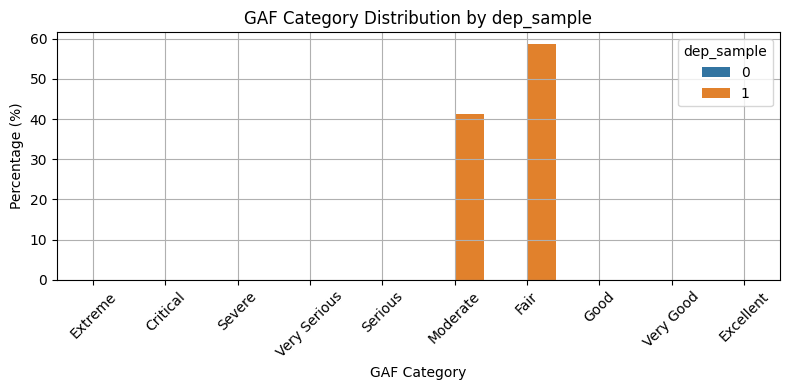

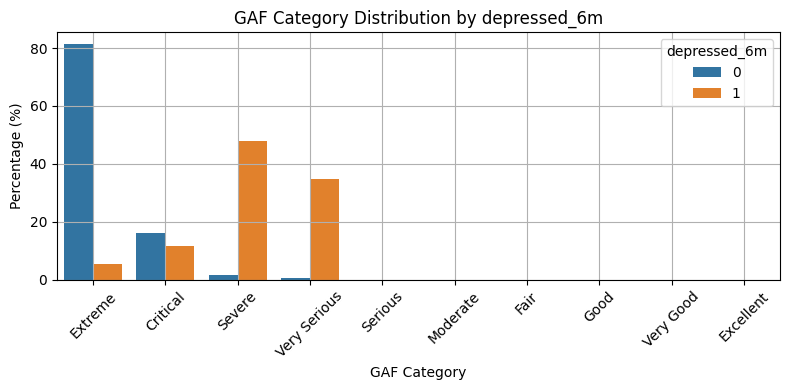

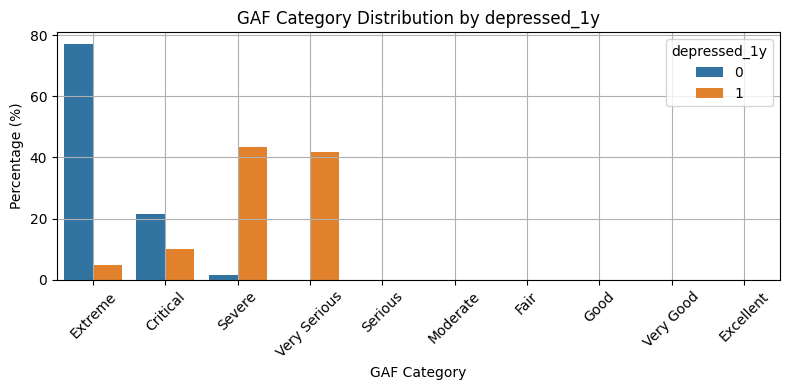

In [447]:
#How are gaf score - Global Assessment of Functioning scores distributed among depressed and non-depressed groups at baseline, 6 months, and 1 year?
gaf_dict = {
    'dep_sample': ['gaf_baseline_cat'],
    'depressed_6m': ['gaf_6m_2_cat'],
    'depressed_1y': ['gaf_1y_2_cat']
}

# Looping through each group
for group, cols in gaf_dict.items():
    for col in cols:

        plot_data = df.groupby([group, col],observed=False).size().reset_index(name='count')
        plot_data['percent'] = plot_data.groupby(group)['count'].transform(lambda x: 100*x/x.sum())

        # Line plot
        plt.figure(figsize=(8,4))
        sn.barplot(data=plot_data, x=col, y='percent', hue=group)
        plt.title(f"GAF Category Distribution by {group}")
        plt.ylabel("Percentage (%)")
        plt.xlabel("GAF Category")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend(title=group)
        plt.tight_layout()
        plt.show()


In [448]:
cols = ["abortion", "stillbirth"]
depression_cols = ["dep_sample", "depressed_6m", "depressed_1y", "depressed"]

for col in cols:
    for dep_col in depression_cols:
        table = pd.crosstab(df[col], [df[dep_col]==1])
        chi2, p, dof, expected = chi2_contingency(table)
        print(f"{col} vs {dep_col}: p-value = {p:.4f}")

abortion vs dep_sample: p-value = 1.0000
abortion vs depressed_6m: p-value = 0.0154
abortion vs depressed_1y: p-value = 0.2140
abortion vs depressed: p-value = 0.6542
stillbirth vs dep_sample: p-value = 1.0000
stillbirth vs depressed_6m: p-value = 0.1623
stillbirth vs depressed_1y: p-value = 0.2289
stillbirth vs depressed: p-value = 0.0224


Abortion and Depression

There is no significant difference between abortion and depression at baseline,after a year or 7 years.However, a notably significant association between abortion and being depressed at 6 months (depressed_6m, p=0.0154) is spotted and this suggests that women who had an abortion were more likely to be depressed in the 6-months 

Stillbirth and Depression
There is no significant association in stillbirth and depression at baseline(start of the study), 6 months, or 1 year
There is a significant association between stillbirth and depression status after 7 years (depressed, p=0.0224),indicating that women who experienced a stillbirth to be depresssed for a long time
Interpretation:
Most associations between abortion/stillbirth and depression are not statistically significant, except:

Abortion is linked to higher depression at 6 months.
Stillbirth is linked to higher overall depression for 7 years.
These findings suggest that experiencing an abortion or stillbirth can increase the risk of depression at certain period of time but it is not consistent across all depression periods in the dataset



In [449]:
print(df["abortion"].value_counts())
print(df["stillbirth"].value_counts())
print(df["moved"].value_counts())
print(df['refused'].value_counts())


abortion
0.0    898
1.0      5
Name: count, dtype: int64
stillbirth
0.0    874
1.0     29
Name: count, dtype: int64
moved
0.0    792
1.0    111
Name: count, dtype: int64
refused
0.0    818
1.0     85
Name: count, dtype: int64


Treatment Status Influences Depression Trends Over Time

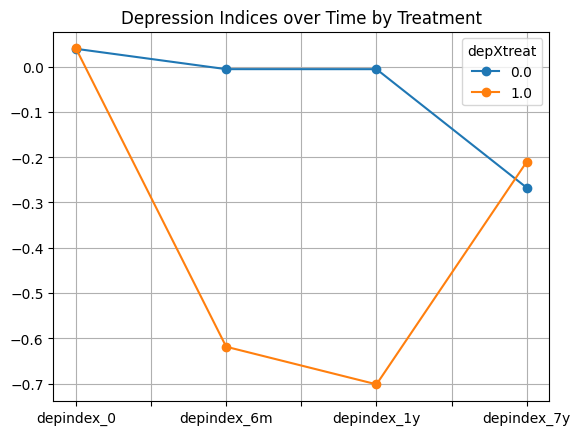

In [450]:
# Plot trends for depression index
dep_indices = ["depindex_0","depindex_6m","depindex_1y","depindex_7y"]
df.groupby("depXtreat")[dep_indices].mean().T.plot(marker="o") #rasnposing the rows to become columns and colummns row;vice versa
plt.grid(True)
plt.title("Depression Indices over Time by Treatment")
plt.show()



In [451]:
df.groupby("treat")[["depindex_0", "depindex_6m", "depindex_1y"]].mean()


,depindex_0,depindex_6m,depindex_1y
treat,,,
0,0.046652,0.017738,0.013615
1,0.064935,-0.579559,-0.674488


good z scores 

Among treated participants, do empowered vs non-empowered mothers show different improvements?

           depindex_0  depindex_6m  depindex_1y
empowered                                      
0            0.016820    -0.197949    -0.156182
1            0.019199    -0.402855    -0.510478


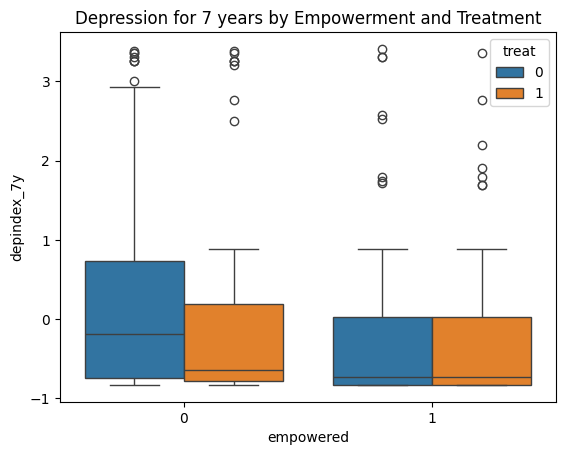

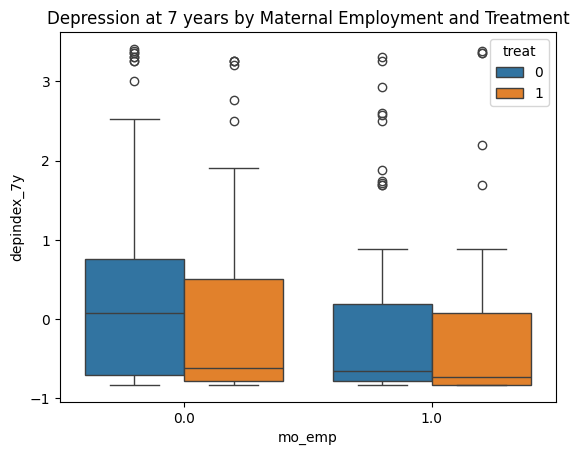

In [452]:
# Descriptive statistics by empowerment
descriptive_stat = df.groupby("empowered")[["depindex_0","depindex_6m","depindex_1y"]].mean()
print(descriptive_stat)

# Boxplot of depression by empowerment status
sn.boxplot(x="empowered", y="depindex_7y", hue="treat", data=df)
plt.title("Depression for 7 years by Empowerment and Treatment")
plt.show()

#Boxplot od depression by employment status
sn.boxplot(x="mo_emp", y="depindex_7y", hue="treat", data=df)
plt.title("Depression at 7 years by Maternal Employment and Treatment")
plt.show()



Treated groups (orange boxes) generally have lower median depression scores and less spread (lower and more compact boxes), especially among not empowered/not employed mothers.
Empowerment and employment are both associated with lower depression scores, regardless of treatment, but the effect is more pronounced in the treated group.
Outliers (dots above the boxes) show some individuals have much higher depression scores, but most are clustered lower in the treated and empowered/employed groups.
Summary:
Treatment, empowerment, and employment are each associated with lower depression scores at 7 years. The lowest depression is seen in treated, empowered, or employed mothers.

In [453]:
samecol = df["var29"].equals(df["famstruct_baseline"])
print(samecol)
if samecol == True:
    df = df.drop("var29", axis=1)
else:
    print("Not the same column")


True


                    depindex_0  depindex_6m  depindex_1y
famstruct_baseline                                      
0                     0.172486    -0.143833    -0.203939
1                    -0.025935    -0.390692    -0.438153


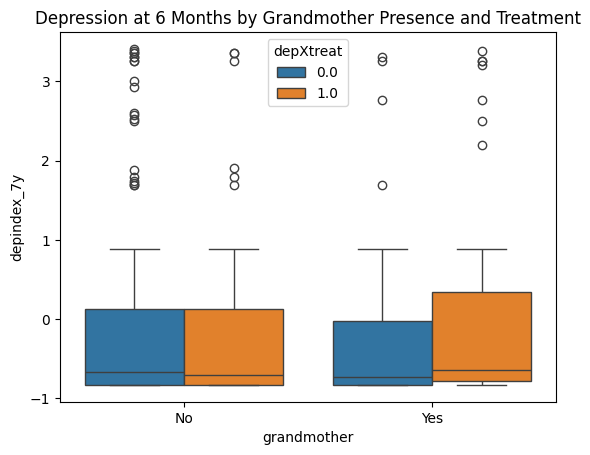

In [454]:
# Descriptive statistics for nuclear families
family= df.groupby("famstruct_baseline")[["depindex_0","depindex_6m","depindex_1y"]].mean()
print(family)

# Grandmother present vs absent
sn.boxplot(x="grandmother", y="depindex_7y", hue="depXtreat", data=df)
plt.title("Depression at 6 Months by Grandmother Presence and Treatment")
plt.show()


At 6 months, children’s depression indices at 7 years (depindex_7y) were examined by grandmother presence and treatment group. Overall, median depression scores were similar across grandmother presence, though variability was slightly higher when a grandmother was present. Treatment did not show a clear reduction in depression; in fact, the treatment group exhibited greater variability in outcomes when a grandmother was present. Several high outliers suggest that some children experienced substantially higher depression regardless of treatment or grandmother presence.

Are mothers who engage more in infant play or discussions with family showing faster improvement in depression?

In [455]:
#people who were depressed at the start but weren't after 6months and 1 year
df["improved_1y"] = ((df["dep_sample"] == 1) & (df["depressed_1y"] == 0))

# Group by play frequency and calculate improvement rates
play_improved_1y = df.groupby("play_mo_1y")["improved_1y"].mean()

print("\nImprovement rate for depressed people by play infant play")
print(play_improved_1y)


Improvement rate for depressed people by play infant play
play_mo_1y
0        0.25
1    0.428571
2    0.428044
3    0.698225
4    0.763636
Name: improved_1y, dtype: Float64


In [456]:
# Proportion of depressed at 6 months by feeding status
prop_depressed_6m = df.groupby("exclusivebf_6m")["depressed_6m"].mean()
print("Proportion depressed at 6 months by exclusive breastfeeding:")
print(prop_depressed_6m)

# If you want to test for association:
contingency = pd.crosstab(df["exclusivebf_6m"], df["depressed_6m"])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\nChi-square test p-value: {p:.4f}")

Proportion depressed at 6 months by exclusive breastfeeding:
exclusivebf_6m
0.0    0.365354
1.0    0.368932
Name: depressed_6m, dtype: Float64

Chi-square test p-value: 1.0000


Not significant

Do children of depressed mothers attain the expected mean child height and weight?

In [457]:
# Calculate z-scores for child weight and height at 6 months and 1 year using sample mean and std

for age, wt_col, ht_col in [("6m", "c_wt_6m", "c_ht_6m"), ("1y", "c_wt_1y", "c_ht_1y")]:
    # Weight-for-age z-score (WAZ)
    mean_wt = df[wt_col].mean()
    std_wt = df[wt_col].std()
    df[f"ch_{age}_wt_z"] = (df[wt_col] - mean_wt) / std_wt


    # Height-for-age z-score (HAZ)
    mean_ht = df[ht_col].mean()
    std_ht = df[ht_col].std()
    df[f"ch_{age}_ht_z"] = (df[ht_col] - mean_ht) / std_ht


In [458]:
# Comparing child growth outcomes by maternal depression at 6 months and 1 year

# At 6 months
print("Child growth at 6 months by maternal depression status (depressed_6m):")
print(df.groupby("depressed_6m")[["HAZ_6", "WAZ_6", "ch_6m_wt_z", "ch_6m_ht_z"]].mean())
print()

# At 1 year
print("Child growth at 1 year by maternal depression status (depressed_1y):")
print(df.groupby("depressed_1y")[["HAZ_12", "WAZ_12", "ch_1y_wt_z","ch_1y_ht_z",]].mean())
print()

Child growth at 6 months by maternal depression status (depressed_6m):
                 HAZ_6     WAZ_6  ch_6m_wt_z  ch_6m_ht_z
depressed_6m                                            
0            -0.627516 -0.765800    0.062599    0.048868
1            -0.826493 -0.991704   -0.108737   -0.085154

Child growth at 1 year by maternal depression status (depressed_1y):
                HAZ_12    WAZ_12  ch_1y_wt_z  ch_1y_ht_z
depressed_1y                                            
0            -1.053285 -1.941238    0.106858    0.131975
1            -1.492534 -2.310000   -0.151734   -0.187291

